In [2]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import modules.spectral_functions as spec_fun
import modules.sff as sff_module
import modules.adiabatics as agp
import modules.anderson as anderson
import importlib
from utils.fit_functions import *
def reload_modules():
    importlib.reload(anderson)
    importlib.reload(hfun)
    importlib.reload(cf)
    importlib.reload(thouless)
    importlib.reload(spec_fun)
    importlib.reload(agp)
    importlib.reload(sff_module)

reload_modules()

from utils.fit_functions import *
#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit

print(cf.base_directory)
from cmath import nan
import h5py    


user_settings = getattr(cf.plot_settings, 'settings')


../results/HEISENBERG/disorder/PBC/


## MODEL FROM HAQUE2020 with all terms
$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[ (1-\eta_\alpha)S^x_\ell S^x_{\ell+\alpha} + (1+\eta_\alpha)S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right]\\
            + h_z\sum_\ell\left(1-\frac{1}{2}\delta_{jL}\right)S^z_\ell + h_x\sum_\ell\left(1-\frac{1}{2}\delta_{j1}\right)S^x_\ell\\
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\eta_1=\eta_2=0.5\\
\Delta_1=\Delta_2=0.9\\
h_z=0.8\\
h_x=0.2
$$

Text(0.5, 1.0, 'Variance of entropy Entropy for all eigenstates')

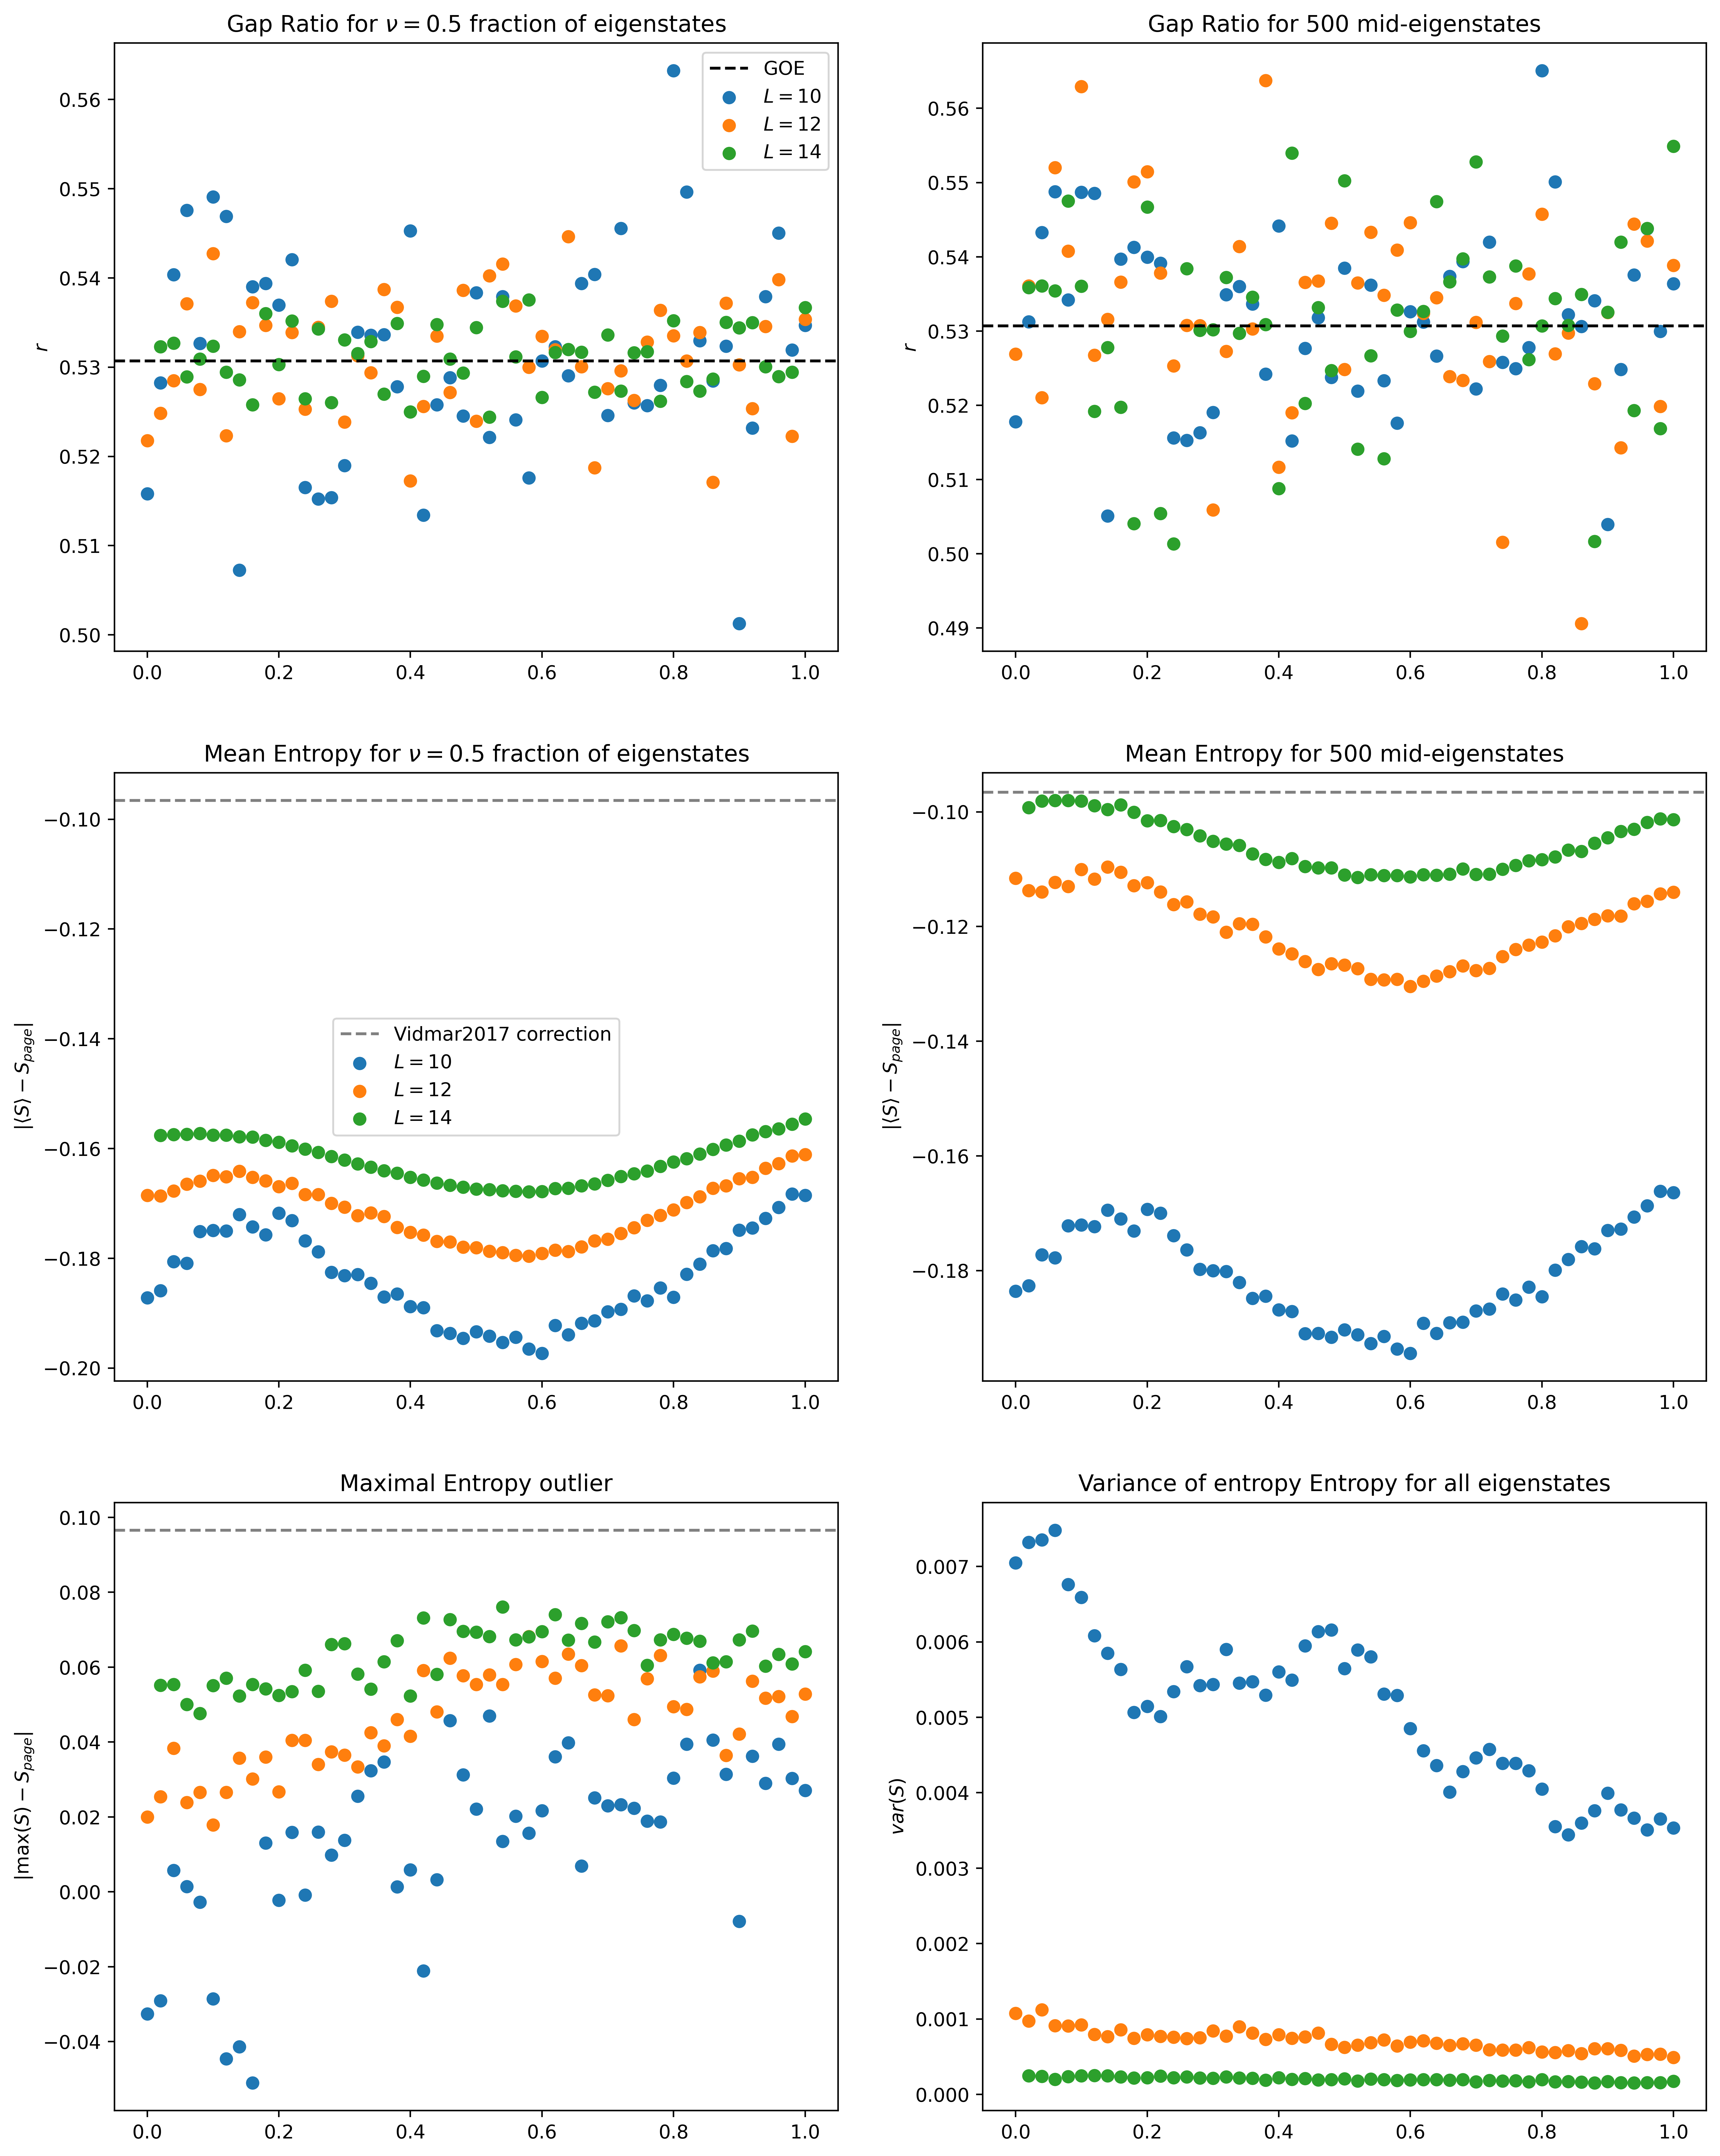

In [4]:

dir = "../results/XYZ/disorder/OBC/Entropy/Eigenstate/old XYZ model with 3 parity breaking/"
L=10
J=0.5
J0=0.5
g=0.9
g0=0.9
h=0.8
w=0.2

fig, ax = plt.subplots( nrows=3, ncols=2, figsize=(15,20), dpi = 500)

J2_list = hfun.regspace(0.0, 1.02, 0.02)
sizes = [10, 12, 14]

for L in sizes:
    Smax = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5
    Spage = L * np.log(2) / 2. - 0.5

    Smean = []
    Smean_500 = []
    Smax = []
    Svar = []
    gap_ratio = []
    gap_ratio_500 = []
    for J2 in J2_list:
        info = hfun.info_dis(L, J2, J0, g, g0, h, w)
        info = dir + info[0 : info.index('.dat') :]

        filename = info + "_subsize=%d_jobid=0.hdf5"%(L/2)
        if exists(filename):
            data = []
            with h5py.File(filename, "r") as f:
                # Print all root level object names (aka keys) 
                # these can be group or dataset names 
                #print("Keys: %s" % f.keys())
                energies = np.array(f.get('energies')[0])
                entropy = np.array(f.get('entropy')[0])
        
            size = energies.size
            my_min = int(0.5 * size - 250)
            my_max = int(0.5 * size + 250)
            if my_min < 0: my_min = int(0.1 * size)
            if my_max > size: my_max = int(0.9 * size)
            
            Smax.append((Spage - max(entropy)))
            meanS = (np.mean(entropy[int(0.25 * size):int(0.75 * size)]) - Spage)
            Smean.append(meanS)

            sample = entropy[my_min : my_max]
            meanS = (np.mean(sample) - Spage)
            Smean_500.append(meanS)
            Svar.append(np.var(sample))

            gaps = np.diff(energies)
            
            ratio = 0
            counter = 0
            for i in range(int(0.25 * size), int(0.75 * size)):
                ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                counter += 1
            gap_ratio.append(ratio / counter)


            ratio = 0
            counter = 0
            for i in range(int(my_min), int(my_max)):
                ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                counter += 1
            gap_ratio_500.append(ratio / counter)
        else:
            gap_ratio_500.append(np.nan)
            gap_ratio.append(np.nan)
            Smean_500.append(np.nan)
            Smean.append(np.nan)
            Svar.append(np.nan)
            Smax.append(np.nan)


    ax[0][0].scatter(J2_list, gap_ratio, label=r"$L=%d$"%L);            ax[0][0].set_ylabel(r"$r$")
    ax[0][1].scatter(J2_list, gap_ratio_500, label=r"$L=%d$"%L);        ax[0][1].set_ylabel(r"$r$")
    ax[1][0].scatter(J2_list, Smean, label=r"$L=%d$"%L);                ax[1][0].set_ylabel(r"$|\langle S\rangle - S_{page}|$")
    ax[1][1].scatter(J2_list, Smean_500, label=r"$L=%d$"%L);            ax[1][1].set_ylabel(r"$|\langle S\rangle - S_{page}|$")
    ax[2][0].scatter(J2_list, Smax, label=r"$L=%d$"%L);                 ax[2][0].set_ylabel(r"$|\max(S) - S_{page}|$")
    ax[2][1].scatter(J2_list, Svar, label=r"$L=%d$"%L);                 ax[2][1].set_ylabel(r"$var(S)$")

ax[0][0].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
ax[0][1].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
ax[0][0].legend()
ax[1][0].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[1][1].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[1][0].legend()
ax[2][0].axhline(y=np.abs(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
#ax[2][1].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[0][0].set_title(r"Gap Ratio for $\nu=0.5$ fraction of eigenstates")
ax[0][1].set_title(r"Gap Ratio for 500 mid-eigenstates")
ax[1][0].set_title(r"Mean Entropy for $\nu=0.5$ fraction of eigenstates")
ax[1][1].set_title(r"Mean Entropy for 500 mid-eigenstates") 
ax[2][0].set_title(r"Maximal Entropy outlier")
ax[2][1].set_title(r"Variance of entropy Entropy for all eigenstates")        

## SU(2) BROKEN WITH BROKEN PARITY (LOCAL IMPURITY)

$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[ (1-\eta_\alpha)S^x_\ell S^x_{\ell+\alpha} + (1+\eta_\alpha)S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right] + \sum_\ell h^z_\ell S^z_\ell
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\eta_1=\eta_2=0.5\\
\Delta_1=\Delta_2=0.9\\
\\
h^z_\ell=\left\{\begin{array}{cc}
w& \ell=L\\
h^z&\text{otherwise}
\end{array}\right.\\
w=0.1\\
h^z=0.8
$$
Varying $h_z$ and $J_2$

In [122]:

dir = "../results/XYZ/disorder/OBC/Entropy/Eigenstate/"
L=10
J=0.5
J0=0.5
g=0.9
g0=0.2
h=0.8
w=0.1

sizes = [12]

J2_list = (hfun.regspace(0.0, 2.1, 0.1))
h_list = (hfun.regspace(0.0, 2.1, 0.1))

def get_data(L):
    
    Srand_max = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5
    Spage = L * np.log(2) / 2. - 0.5

    Smean = []
    Smax = []
    Svar = []
    gap_ratio = []

    for h in h_list:
        Smean_tmp = []
        Smax_tmp = []
        Svar_tmp = []
        gap_ratio_tmp = []

        for J2 in J2_list:
            info = hfun.info_dis(L, J2, J0, g, g0, h, w)
            info = dir + info[0 : info.index('.dat') :]

            filename = info + "_subsize=%d_jobid=0.hdf5"%(L/2)
            if exists(filename):
                data = []
                with h5py.File(filename, "r") as f:
                    # Print all root level object names (aka keys) 
                    # these can be group or dataset names 
                    #print("Keys: %s" % f.keys())
                    energies = np.array(f.get('energies')[0])
                    entropy = np.array(f.get('entropy')[0])
                    for i, E in enumerate(energies[:-1]):
                        if np.abs(E - energies[i+1]) < 1e-12:
                            print("Degeneracy at i=", i)

                size = energies.size
                
                my_min = int(0.5 * size - 250)
                my_max = int(0.5 * size + 250)
                if my_min < 0: my_min = int(0.1 * size)
                if my_max > size: my_max = int(0.9 * size)

                Smax_tmp.append((Srand_max - max(entropy)))

                sample = entropy[my_min : my_max]
                meanS = (np.mean(sample) - Srand_max)
                Smean_tmp.append(meanS)
                Svar_tmp.append(np.var(sample))

                gaps = np.diff(energies)

                ratio = 0
                counter = 0
                for i in range(int(0.25 * size), int(0.75 * size)):
                    ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                    counter += 1
                gap_ratio_tmp.append(ratio / counter)

            else:
                gap_ratio_tmp.append(np.nan)
                Smean_tmp.append(np.nan)
                Svar_tmp.append(np.nan)
                Smax_tmp.append(np.nan)

        Smean.append(np.array(Smean_tmp))
        Smax.append(np.array(Smax))
        Svar.append(np.array(Svar))
        gap_ratio.append(np.array(gap_ratio_tmp))

    Smean = np.array(Smean)
    gap_ratio = np.array(gap_ratio)
    Svar = np.array(Svar)
    Smax = np.array(Smax)

    return gap_ratio, Smean, Smax, Svar

gap_ratio, Smean, Smax, Svar = get_data(L=12)


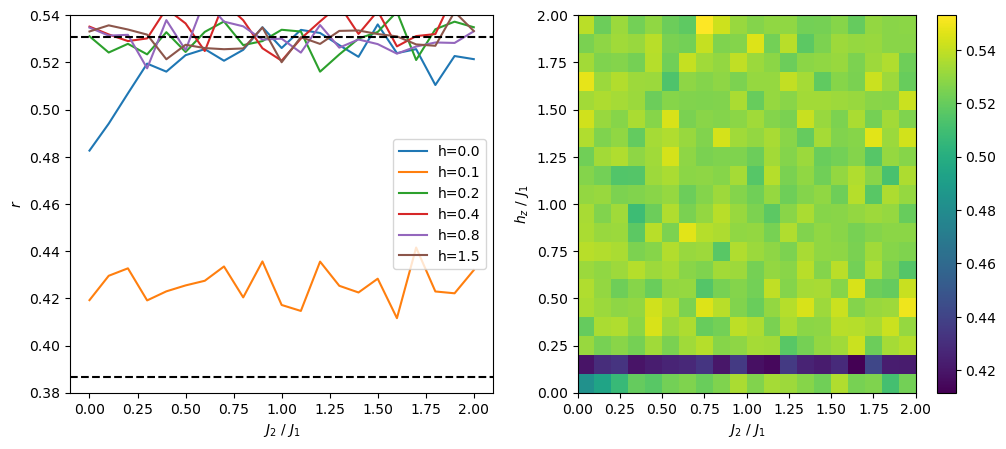

In [123]:
hcuts = [0.0, 0.1, 0.2, 0.4, 0.8, 1.5]

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(12, 5), dpi = 100)


X, Y = np.meshgrid(h_list, J2_list)
p = ax[1].pcolormesh(X, Y, gap_ratio, shading='flat')
ax[1].set_xlabel(r"")
fig.colorbar(p)

for h in hcuts:
    idx = hfun.find_index(h_list, h)
    if idx >=0 :
        ax[0].plot(J2_list, gap_ratio[idx], label=r"h=%.1f"%h)

ax[0].set_xlabel(r"$J_2\ /\ J_1$")
ax[0].set_ylabel(r"$r$")
ax[1].set_xlabel(r"$J_2\ /\ J_1$")
ax[1].set_ylabel(r"$h_z\ /\ J_1$")
ax[0].legend()

ax[0].set_ylim(0.38, 0.54)

ax[0].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
ax[0].axhline(y=0.3867, linestyle='--', color='black', label='Poisson')

Text(0, 0.5, '$h_z\\ /\\ J_1$')

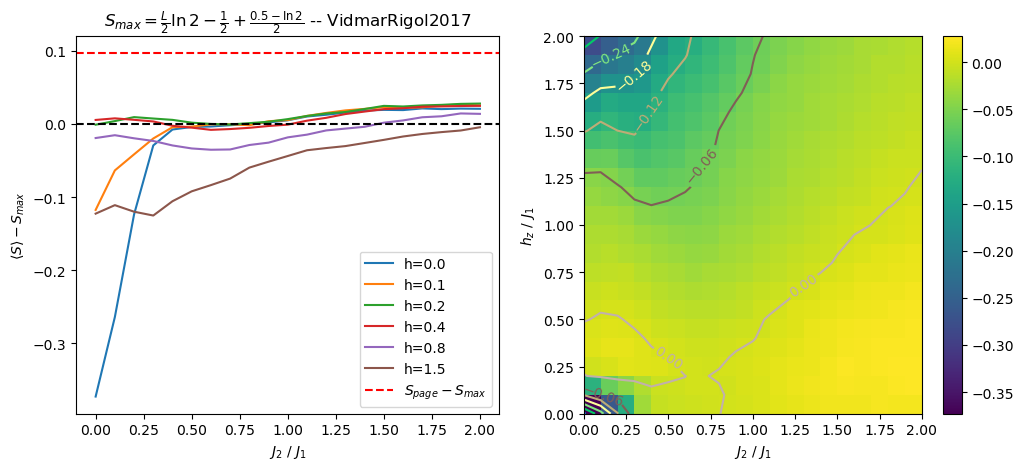

In [124]:

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(12, 5), dpi = 100)

X, Y = np.meshgrid(h_list, J2_list)
p = ax[1].pcolormesh(X, Y, Smean, shading='flat')

# countour needs the center points
x_center = 0.5 * (h_list[:-1] + h_list[1:])
y_center = 0.5 * (J2_list[:-1] + J2_list[1:])
cset = ax[1].contour(X, Y, Smean, cmap='terrain')
ax[1].clabel(cset, inline=True)
fig.colorbar(p)

for h in hcuts:
    idx = hfun.find_index(h_list, h)
    if idx >=0 :
        ax[0].plot(J2_list, Smean[idx], label=r"h=%.1f"%h)

ax[0].set_xlabel(r"$J_2\ /\ J_1$")
ax[0].set_ylabel(r"$\langle S\rangle - S_{max}$")
ax[0].axhline(y=0.0, linestyle='--', color='black')
ax[0].axhline(y=-(0.5 - np.log(2)) / 2., linestyle='--', color='red', label=r"$S_{page}-S_{max}$")
ax[0].legend()

ax[0].set_title(r"$S_{max}=\frac{L}{2}\ln2-\frac{1}{2}+\frac{0.5-\ln2}{2}$ -- VidmarRigol2017")
ax[1].set_xlabel(r"$J_2\ /\ J_1$")
ax[1].set_ylabel(r"$h_z\ /\ J_1$")

## SU(2) CONSERVED WITH BROKEN PARITY (LOCAL IMPURITY)

$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[S^x_\ell S^x_{\ell+\alpha} + S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right] + h^z S^z_L
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\Delta_1=\Delta_2=0.9\\
h^z=0.1
$$
Varying $h_z$ and $J_2$